In [2]:
from pycaret.datasets import get_data
data=get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], facet_col = data['Cut'], opacity = 0.25, trendline='ols', trendline_color_override = 'red')
fig.show()

In [7]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

,Description,Value
0,Session id,3518
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [9]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,633.5062,1744070.3822,1283.1246,0.9840,0.0657,0.0487,0.1190
lightgbm,Light Gradient Boosting Machine,627.5235,1826521.8949,1317.5777,0.9829,0.0651,0.0480,0.0680
rf,Random Forest Regressor,724.0222,2365022.8337,1503.4618,0.9776,0.0770,0.0567,0.2400
et,Extra Trees Regressor,734.8479,2361168.5899,1500.2198,0.9774,0.0780,0.0577,0.2780
gbr,Gradient Boosting Regressor,757.2841,2453167.2799,1521.1947,0.9774,0.0762,0.0571,0.1090
dt,Decision Tree Regressor,950.9307,4034986.9986,1969.2589,0.9615,0.1008,0.0738,0.0520
ada,AdaBoost Regressor,2025.7536,16310091.0528,4016.3944,0.8465,0.1864,0.1520,0.1070
knn,K Neighbors Regressor,2944.3507,34019543.7006,5828.0672,0.6737,0.3561,0.2258,0.0490
omp,Orthogonal Matching Pursuit,3381.8169,87619267.0107,9090.8856,0.1565,0.2832,0.2232,0.0490
lasso,Lasso Regression,6632.7148,118411496.0120,10860.4733,-0.1244,0.7159,0.5663,0.0450


In [10]:
best.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 3518,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

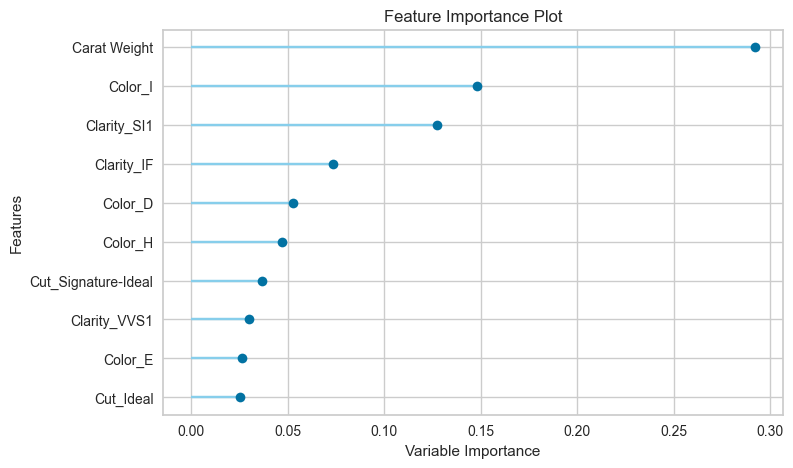

In [11]:
plot_model(best,plot='feature')

In [12]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
# copy data and remove target variable
data_unseen = data.copy()
data_unseen.drop('Price', axis = 1, inplace = True)
predictions = predict_model(best, data = data_unseen)